In [76]:
%matplotlib inline
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt

In [77]:
#loading the data
df_HHE = pd.read_csv('/home/dariagurova91/east.txt', ' ').drop(['NAN'], axis=1)
df_HHN = pd.read_csv('/home/dariagurova91/north.txt', ' ').drop(['NAN'], axis=1)
df_HHZ = pd.read_csv('/home/dariagurova91/vertical.txt', ' ').drop(['NAN'], axis=1)

In [78]:
#creating dataframe
combined = pd.merge(df_HHZ, df_HHN)
combined = pd.merge(combined, df_HHE)
combined = combined.drop(['TIMESERIES_IG_LNIG'], axis=1)

combined

,DISP_VERTICAL,DISP_NORTH,DISP_EAST
0,5.517707e-08,1.744070e-08,-1.019742e-07
1,5.544459e-08,1.752041e-08,-1.028153e-07
2,5.570635e-08,1.759077e-08,-1.036725e-07
3,5.596910e-08,1.765584e-08,-1.045231e-07
4,5.622309e-08,1.771283e-08,-1.053823e-07
5,5.647776e-08,1.776250e-08,-1.062411e-07
6,5.672366e-08,1.780500e-08,-1.071150e-07
7,5.697638e-08,1.784619e-08,-1.079842e-07
8,5.722425e-08,1.787111e-08,-1.088724e-07
9,5.747522e-08,1.790092e-08,-1.097505e-07


Text(0,0.5,'displacements in meters')

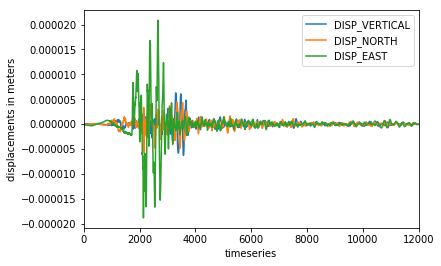

In [22]:
ax = combined.plot()
ax.set_xlabel("timeseries")
ax.set_ylabel("displacements in meters")

In [79]:
#convert displacements into absolute coordinate points
vertical = combined['DISP_VERTICAL'].values
north = combined['DISP_NORTH'].values
east = combined['DISP_EAST'].values

vert_coord = []
north_coord = []
east_coord = []
c = 0
c1 = 0
c2 = 0
for i in range(len(vertical)):
   
    c = c + vertical[i]
    vert_coord.append(c)

    c1 = c1 + north[i]
    north_coord.append(c1)

    c2 = c2 + east[i]
    east_coord.append(c2) 

In [80]:
#adding the results to the dataframe
vert_coord = pd.Series(vert_coord)
north_coord = pd.Series(north_coord)
east_coord = pd.Series(east_coord)

combined['VERTICAL_COORDS'] = vert_coord
combined['NORTH_COORDS'] = north_coord
combined['EAST_COORDS'] = east_coord

In [118]:
#dispacement data and coordinate points
combined

,DISP_VERTICAL,DISP_NORTH,DISP_EAST,VERTICAL_COORDS,NORTH_COORDS,EAST_COORDS,DELTA,S,scaled_x
0,5.517707e-08,1.744070e-08,-1.019742e-07,5.517707e-08,1.744070e-08,-1.019742e-07,1.172494e-07,1.563325e-06,-0.050088
1,5.544459e-08,1.752041e-08,-1.028153e-07,1.106217e-07,3.496111e-08,-2.047895e-07,1.181188e-07,1.574918e-06,-0.100589
2,5.570635e-08,1.759077e-08,-1.036725e-07,1.663280e-07,5.255188e-08,-3.084620e-07,1.189984e-07,1.586646e-06,-0.151512
3,5.596910e-08,1.765584e-08,-1.045231e-07,2.222971e-07,7.020772e-08,-4.129851e-07,1.198722e-07,1.598297e-06,-0.202852
4,5.622309e-08,1.771283e-08,-1.053823e-07,2.785202e-07,8.792055e-08,-5.183674e-07,1.207485e-07,1.609980e-06,-0.254614
5,5.647776e-08,1.776250e-08,-1.062411e-07,3.349980e-07,1.056831e-07,-6.246085e-07,1.216241e-07,1.621655e-06,-0.306798
6,5.672366e-08,1.780500e-08,-1.071150e-07,3.917216e-07,1.234880e-07,-7.317235e-07,1.225080e-07,1.633440e-06,-0.359411
7,5.697638e-08,1.784619e-08,-1.079842e-07,4.486980e-07,1.413342e-07,-8.397077e-07,1.233912e-07,1.645216e-06,-0.412451
8,5.722425e-08,1.787111e-08,-1.088724e-07,5.059222e-07,1.592053e-07,-9.485801e-07,1.242867e-07,1.657156e-06,-0.465928
9,5.747522e-08,1.790092e-08,-1.097505e-07,5.633974e-07,1.771063e-07,-1.058331e-06,1.251759e-07,1.669012e-06,-0.519836


Text(0,0.5,'coordinates')

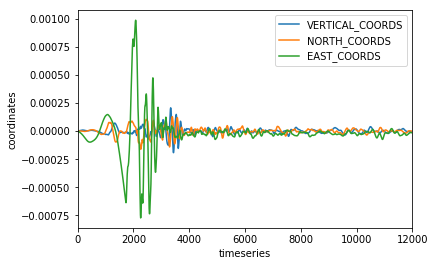

In [82]:
#plot the absolute coordinate points
coordinates = pd.DataFrame()
coordinates['VERTICAL_COORDS'] = combined['VERTICAL_COORDS']
coordinates['NORTH_COORDS'] = combined['NORTH_COORDS']
coordinates['EAST_COORDS'] = combined['EAST_COORDS']
ax = coordinates.plot()
ax.set_xlabel("timeseries")
ax.set_ylabel("coordinates")

In [83]:
#function to calculate delta for each point
def get_delta(column):
    return np.sqrt(column['DISP_VERTICAL']**2 + column['DISP_NORTH']**2 + column['DISP_EAST']**2)

combined['DELTA'] = combined.apply(get_delta, axis=1)

In [84]:
#function to calculate speed for the CNC for each point
def get_S(column):
    return(column['DELTA']/4.5 * 60)
combined['S'] = combined.apply(get_S, axis=1)

98

In [144]:
#scaling to the range of shapeoko
r_x=combined['EAST_COORDS'].max()-combined['EAST_COORDS'].min()
min_x=combined['EAST_COORDS'].min()
print (r_x)
m_r_x=400
scaler_x = m_r_x/r_x
print (scaler_x)

r_y=combined['NORTH_COORDS'].max()-combined['NORTH_COORDS'].min()
min_y=combined['NORTH_COORDS'].min()
m_r_y=400
scaler_y = m_r_y/r_y
print (scaler_y)

r_z=combined['VERTICAL_COORDS'].max()-combined['VERTICAL_COORDS'].min()
min_z=combined['VERTICAL_COORDS'].min()
m_r_z=90
scaler_z = m_r_z/r_z
print (scaler_z)

combined['scaled_x'] = (combined.EAST_COORDS-min_x) * scaler_x
combined['scaled_y'] = (combined.NORTH_COORDS-min_y) * scaler_y
combined['scaled_z'] = (combined.VERTICAL_COORDS-min_z) * scaler_z

0.00175856496697924
227458.1875056323
1377282.5986117537
225591.60534507895


In [145]:
combined['scaled_x'].describe()

count    12001.000000
mean       170.822994
std         38.181241
min          0.000000
25%        166.927747
50%        170.876743
75%        174.874144
max        400.000000
Name: scaled_x, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f99ab71b390>]],
      dtype=object)

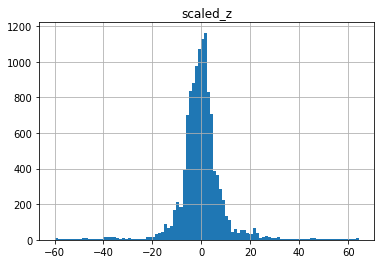

In [120]:
combined.hist(column='scaled_z', bins=100)

In [150]:
#creating Gcode file
#scaler = 50000
file = open('/home/dariagurova91/earth10.txt', 'w')
file.write('G21\n')
g=0
for g in range(12000):
    x = combined['scaled_x'][g] 
    y = combined['scaled_y'][g] 
    z = combined['scaled_z'][g] 
    speed = combined['S'][g] * 1000000000
    g_string="G01 X{:.3f} Y{:.3f} Z{:.3f} F{:.0f} \n".format(x,y,z,speed)
    file.write(g_string)
file.close()
